In [1]:
import os
from collections import defaultdict
from tqdm import tqdm

<center>
University of Colorado Boulder<br>
    <b>Unsupervised Rug Image Clustering</b><br>
George Baker<br>
DTSA 5510 Unsupervised Algorithms in Machine Learning<br>
For Dr. Geena Kim<br>
May 3rd, 2024
</center>

# 1. Problem Statement - Art Historical Rug Clustering

According to Future Market Insights, the Carpet and Rug Market is projected to surpass US$ 171 Billion by 2034 (FMI Inc., 2024); which is about as much as the annual GDP of Ukraine or Kuwait today. High end antique rugs can sell for hundreds of thousands or even millions of U.S. dollars, but are also important for preserving and telling the stories of the cultures that produced them.

Because of the interesting potential educational, art-historical, and business applications of machine-learning based art understanding and classification systems, I decided to create the first computer vision dataset focused exclusively on antique and modern rugs.

In this assignment I examine unsupervised rug clustering in hopes of being able to meaningfully group rugs based on visual features.

<div align="center">
    <img src="https://jackalope.com/wp-content/uploads/2019/06/rugs-wide.jpg" alt="Rug Store">
</div>
<center>Figure 1: A Rug Store</center>

# 2. EDA

The rug dataset (RugNet as I'm calling it) consists of over 40 GB of images of rugs which I collected by webscraping several online antique rug marketplaces using BeautifulSoup, along with information such as price, dimensions, culture of origin, and estimated period in which the rug was made.

In [ ]:
%%capture
!gdown "https://drive.google.com/uc?id=1-CzOio-zN2EJajwHLGbcPveQByGS-ZLc"
!gdown "https://drive.google.com/uc?id=1-E00XdbE6sypGpwDZi4bHOlo2EoEVN0y"
!unzip /content/images_checkpoint_2.zip -q

Downloading...
From (original): https://drive.google.com/uc?id=1-CzOio-zN2EJajwHLGbcPveQByGS-ZLc
From (redirected): https://drive.google.com/uc?id=1-CzOio-zN2EJajwHLGbcPveQByGS-ZLc&confirm=t&uuid=d88ff82d-e092-4087-ad92-21a4e4763824
To: /content/images_checkpoint_2.zip
100% 41.6G/41.6G [06:58<00:00, 99.4MB/s]


In [ ]:
# If connected to google drive
!cp /content/drive/MyDrive/RugNet/data_checkpoint_2.json /content/data_checkpoint_2.json

In [ ]:
!unzip -q /content/drive/MyDrive/RugNet/images_checkpoint_2.zip

In [ ]:
len(df)

9740

In [ ]:
# Counting the number of images per rug

dir ='/content/drive/MyDrive/RugNet/images'

counts = defaultdict(int)
counts_by_id = defaultdict(int)

for root, dirs, files in tqdm(os.walk(dir)):

    for dir in dirs:
      for file in os.walk(os.path.join(root, dir)):
          try:
            counts_by_id[int(file[0].split('/')[-1]), 'n_images'] = len(file[2])
          except:
            pass
          counts[len(file[2])] += 1
      break

194it [00:55,  3.46it/s]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
df_id = pd.DataFrame.from_dict(counts_by_id, orient='index', columns=['n_images'])
df_id.reset_index(inplace=True)
df_id.rename(columns={'index': 'number'}, inplace=True)
df_id.set_index(df_id['number'].apply(lambda x: x[0]), inplace=True)
df_id = df_id.drop(columns=['number'])

In [ ]:
df_id.head()

n_images
number          
59525          1
55872          1
64705          7
66082          7
67226          8

In [2]:
import pandas as pd
df = pd.read_json('/content/drive/MyDrive/RugNet/data_checkpoint_2.json', orient='index')


df.columns = df.columns.str.replace(':','').str.lower().str.strip().str.replace('\xa0',' ')
df.head()

item number                 name country of origin          size  \
71160        71160   Karabagh, ca. 1900          Caucasus  576 x 197 cm   
71159        71159    Turkmen, ca. 1910      Turkmenistan  543 x 246 cm   
71158        71158  Kurdistan, ca. 1910              Iran  590 x 190 cm   
71157        71157   Aubusson, ca. 1900            France  340 x 244 cm   
71156        71156   Aubusson, ca. 1900            France  348 x 244 cm   

           made  pile                     design  \
71160  ca. 1900  wool        geometric / allover   
71159  ca. 1910  wool        geometric / allover   
71158  ca. 1910  wool        geometric / allover   
71157  ca. 1900   NaN           floral / allover   
71156  ca. 1900   NaN  floral / little medallion   

                         ground color  \
71160               red / rosé / gray   
71159                      red / rust   
71158  dark blue / navy / rust / rosé   
71157                           ivory   
71156                           ivory   

                                                 remarks  \
71160  This is a unique handmade / hand-knotted / tra...   
71159  This is a unique handmade / hand-knotted / tra...   
71158  This is a unique handmade / hand-knotted / tra...   
71157  This is a unique handmade / hand-knotted / tra...   
71156  This is a unique handmade / hand-knotted / tra...   

                            price  \
71160                     £ 7,700   
71159                     £ 6,800   
71158  no price yet, send request   
71157                    £ 13,700   
71156                    £ 12,200   

                                             description  \
71160  Karabagh is located in the Russian part of Aze...   
71159                                                      
71158                                                      
71157  Aubusson is the name of a city in the French D...   
71156  Aubusson is the name of a city in the French D...   

                     foundation(warp and weft)  age knots per sqm       
71160                                      NaN  NaN           NaN  NaN  
71159                                      NaN  NaN           NaN  NaN  
71158                                      NaN  NaN           NaN  NaN  
71157  wool (this is a flatweave without pile)  NaN           NaN  NaN  
71156  wool (this is a flatweave without pile)  NaN           NaN  NaN

In [ ]:
df =  df.merge(df_id, left_index=True, right_index=True)
print(len(df))
df = df[df['n_images'] != 0]
print(len(df))

8706
8706


In [ ]:
n_images = 0
for k in counts.keys():
  n_images += counts[k] * k
print(f"Total number of images: {n_images}")

Total number of images: 38366


[]

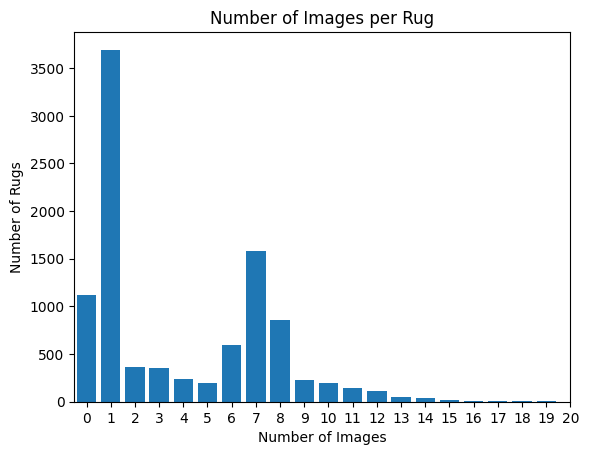

In [ ]:
import matplotlib.pyplot as plt
plt.bar(counts.keys(), counts.values())

plt.xlim(-.5, 20)
plt.xticks(range(21))
plt.title("Number of Images per Rug")
plt.xlabel("Number of Images")
plt.ylabel("Number of Rugs")
plt.plot()

It looks like a number of the URLs I scraped didn't have any images; we should drop these.

In [ ]:
!find /content/content/images -type d -empty -exec rmdir {} + -printf "Removed empty directory: %p\n" | wc -l

1120


In [ ]:
# Copying to my drive for later use
!cp -r /content/content/images /content/drive/MyDrive/RugNet/images

<Figure size 1000x700 with 0 Axes>

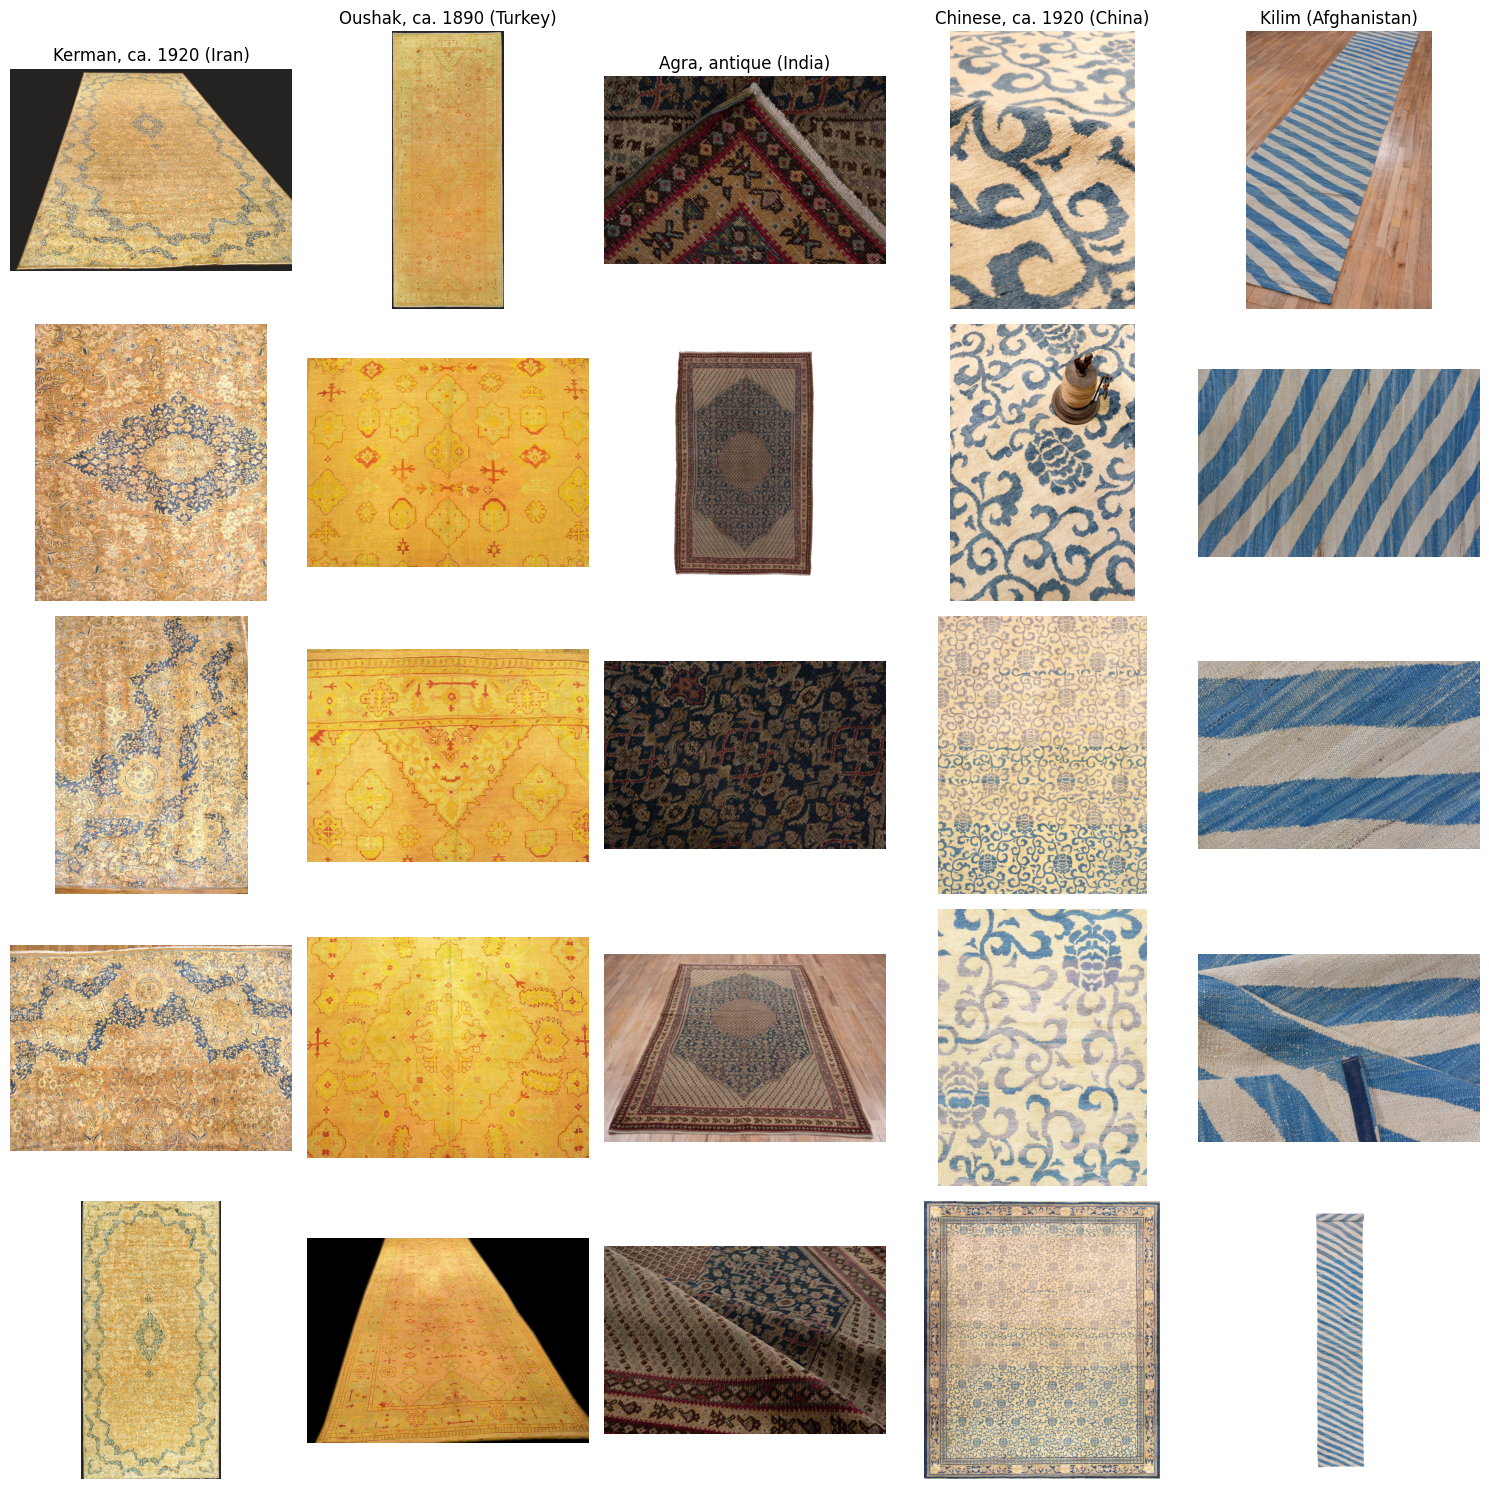

In [ ]:
# Here I plot some examples
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 5
columns = 5

image_sample_paths = []
ids = []

# Get the 5 top countries of origin
for x in df['country of origin'].value_counts().head(5).items():
  country = x[0]
  id = df[ (df['country of origin'] == country) & (df['n_images'] == 5)].head(1)['item number'].keys()[0]
  image_sample_paths.extend([f"/content/content/images/{id}/" + f for f in os.listdir(f"/content/content/images/{id}")])
  ids.append(id)


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, ax_row in enumerate(axes):
        for j, ax in enumerate(ax_row):
            index = j * (5) + i
            image_path = image_sample_paths[index]
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image)


            if index % 5 == 0:
              ax.set_title(f"{df.loc[ids[j]]['name']} ({df.loc[ids[j]]['country of origin']})")
            ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df['country of origin'].unique()

array(['Caucasus', 'Turkmenistan', 'Iran', 'France', 'Turkey', 'India',
       'China', 'Pakistan', 'Romania', 'Afghanistan',
       "Sorry, we can't give you the origin of this carpet at the moment.",
       'Russia', 'Belgium', 'Europe', 'England', 'Spain', 'Sweden',
       'Austria', 'Morocco', 'Tibet', 'Central Asia', 'Nepal',
       'North Africa', 'Ireland', 'Portugal', 'Moldova', 'Egypt',
       'Mongolia', 'Turkestan', 'Azerbaijan', 'USA', 'Anatolia',
       'Armenia', 'Scandinavia', 'iran', 'Germany', 'Uzbekistan',
       'Finland', 'Ukraine', 'Mauritania', 'Balkan', 'Poland', 'Hungary'],
      dtype=object)

In [ ]:
df['country of origin'].value_counts()

country of origin
Iran                                                                 3935
Turkey                                                               1310
India                                                                1304
China                                                                 578
Afghanistan                                                           356
Pakistan                                                              334
Morocco                                                               176
France                                                                129
Caucasus                                                              121
Sorry, we can't give you the origin of this carpet at the moment.      94
Russia                                                                 73
Egypt                                                                  72
Central Asia                                                           44
Europe              

In [ ]:
import numpy as np

def fix_labels(mylabels, tooclose=0.1, sepfactor=2):
    vecs = np.zeros((len(mylabels), len(mylabels), 2))
    dists = np.zeros((len(mylabels), len(mylabels)))
    for i in range(0, len(mylabels)-1):
        for j in range(i+1, len(mylabels)):
            a = np.array(mylabels[i].get_position())
            b = np.array(mylabels[j].get_position())
            dists[i,j] = np.linalg.norm(a-b)
            vecs[i,j,:] = a-b
            if dists[i,j] < tooclose:
                mylabels[i].set_x(a[0] + sepfactor*vecs[i,j,0])
                mylabels[i].set_y(a[1] + sepfactor*vecs[i,j,1])
                mylabels[j].set_x(b[0] - sepfactor*vecs[i,j,0])
                mylabels[j].set_y(b[1] - sepfactor*vecs[i,j,1])

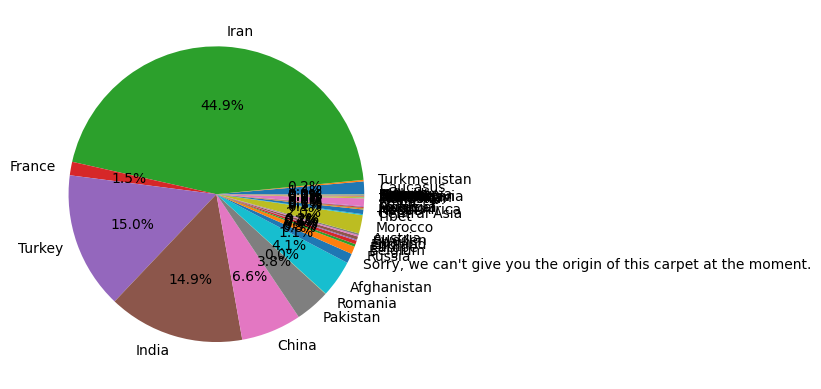

In [ ]:
import matplotlib.pyplot as plt

labels = df['country of origin'].unique()
sizes = [len(df[df['country of origin'] == label]) for label in labels]

fig, ax = plt.subplots()


wedges, labels, autopct = ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

## 2.1 Data Cleaning
As we see above there are a lot of very small classes. For the purposes of this assignment we'll use only the top 10.

In [3]:
top_10_countries = df['country of origin'].value_counts().nlargest(10).index.tolist()

new_df = df[df['country of origin'].isin(top_10_countries)]

In [4]:
# Fixing long label
new_df.loc[new_df['country of origin'] == "Sorry, we can't give you the origin of this carpet at the moment.", 'country of origin'] = 'Unknown'

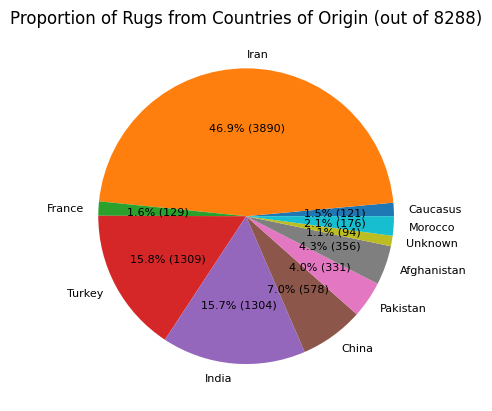

In [ ]:
import matplotlib.pyplot as plt

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}% ({v:d})'.format(pct, v=val)
        return my_format


labels = new_df['country of origin'].unique()
sizes = [len(new_df[new_df['country of origin'] == label]) for label in labels]

fig, ax = plt.subplots()

s = new_df['country of origin'].value_counts()
wedges, labels, autopct = ax.pie(sizes, labels=labels, autopct = autopct_format(s), textprops={'fontsize': 8})

plt.title('Proportion of Rugs from Countries of Origin (out of 8288)')
plt.show()

I want to ensure that the countries of origin are represented evenly in the train/test split, so I do that below:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

unique_countries = new_df['country of origin'].unique()

train_data = pd.DataFrame()
valid_data = pd.DataFrame()
test_data = pd.DataFrame()

for country in unique_countries:
    country_data = new_df[new_df['country of origin'] == country]

    train, temp = train_test_split(country_data, test_size=0.2, random_state=42)
    valid, test = train_test_split(temp, test_size=0.5, random_state=42)

    train_data = pd.concat([train_data, train])
    valid_data = pd.concat([valid_data, valid])
    test_data = pd.concat([test_data, test])

In [ ]:
train_data.head()

item number                      name country of origin          size  \
67950        67950  Transcaucasian, ca. 1920          Caucasus  246 x 114 cm   
67946        67946         Karabagh, antique          Caucasus  236 x 127 cm   
44002        44002      Kilim Kuba, ca. 1890          Caucasus  465 x 213 cm   
62587        62587         Karabagh, antique          Caucasus  290 x 109 cm   
58082        58082         Shirvan, ca. 1960          Caucasus  441 x 317 cm   

           made  pile                 design  ground color  \
67950  ca. 1920  wool    geometric / allover      dark red   
67946       NaN  wool  geometric / medallion         brown   
44002  ca. 1890   NaN    geometric / allover      old rosé   
62587       NaN  wool       floral / allover  gray / green   
58082  ca. 1960  wool    geometric / allover           red   

                                                 remarks     price  \
67950  This is a unique handmade / hand-knotted / tra...   £ 3,800   
67946  This is a unique handmade / hand-knotted / tra...   £ 3,800   
44002  This is a unique handmade / hand-knotted / tra...  £ 23,000   
62587  This is a unique handmade / hand-knotted / tra...   £ 3,800   
58082  This is a unique handmade / hand-knotted / tra...   £ 2,900   

                                             description  \
67950                                                      
67946  Karabagh is located in the Russian part of Aze...   
44002  This is an Oriental nomadic rug. The word "nom...   
62587  Karabagh is located in the Russian part of Aze...   
58082  Shirvan is located in West Caucasia in Azerbai...   

                     foundation(warp and weft)      age knots per sqm       
67950                                      NaN      NaN           NaN  NaN  
67946                                      NaN  antique           NaN  NaN  
44002  wool (this is a flatweave without pile)      NaN           NaN  NaN  
62587                                      NaN  antique           NaN  NaN  
58082                                      NaN      NaN           NaN  NaN

## 2.2 Data Transformations

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Here I'm calculating the pixel mean and std to normalize my images.

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
from tqdm import tqdm

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        try:
          img = Image.open(img_path).convert('RGB')
          if self.transform:
              img = self.transform(img)
          return img
        except OSError as e:
            print(f"Error processing {img_path}: {e}")
            try:
              id = img_path.split('/')[-1].split('.')[0]
              alt_path = f'/content/drive/MyDrive/RugNet/images/{id}/{id}.2.jpg'
              img = Image.open(alt_path).convert('RGB')
              if self.transform:
                  img = self.transform(img)
              return img
            except  OSError as e:
              print(f"Error processing {alt_path}: {e}")

            return None

file_names = [f"/content/drive/MyDrive/RugNet/images/{id}/{id}.jpg" for id in train_data['item number']]

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = CustomDataset(file_names, transform=transform)

loader = DataLoader(dataset, batch_size=10, num_workers=0, shuffle=False)

mean = 0.
std = 0.
nb_samples = 0.
for data in tqdm(loader):
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

  1%|          | 5/663 [00:02<05:43,  1.92it/s]


KeyboardInterrupt: 

In [ ]:
print(mean)
print(std)

tensor([0.6150, 0.5211, 0.4753])
tensor([0.1858, 0.1946, 0.1902])


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
from tqdm import tqdm

resize_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [6]:
import cv2

import os
import pickle
import sys
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

from tqdm import tqdm

class RugNet(Dataset):
  def __init__(self, ids, labels, root='/content/drive/MyDrive/RugNet/images', train=True, transform=None):

        super(RugNet, self).__init__()
        self.root = root
        self.transform = transform
        self.train = train  # training set or test set
        self.classes = ['Iran', 'Turkey', 'India', 'China', 'Afghanistan', 'Pakistan', 'Morocco', 'France', 'Caucasus', 'Unknown']
        self.classes = {i: label for i, label in enumerate(self.classes)}
        self.classes_inverse = {v: k for k, v in self.classes.items()}

        self.data = []
        self.targets = []

        print_first_n = 5

        for label, id in tqdm(zip(labels, ids)):
            file_path = self.root + f"/{id}/{id}.jpg"

            if not os.path.exists(file_path):
              file_path = self.root + f"/{id}/{id}.2.jpg"

            try:
              img = Image.open(file_path).convert('RGB')

              img = img.resize((128, 128))
              if print_first_n > 0:
                print_first_n -= 1


              if self.transform:
                img = self.transform(img)

              self.data.append(img)
              self.targets.append(self.classes_inverse[label])
            except:
              print(f"Error processing {file_path}")

        self.data = np.vstack(self.data).reshape(-1, 3, 128, 128)
        self.data = self.data.transpose((0, 2, 3, 1))


  def __getitem__(self, index):
      """
      Args:
          index (int): Index
      Returns:
          dict: {'image': image, 'target': index of target class, 'meta': dict}
      """
      img, target = self.data[index], self.targets[index]
      img_size = (img.shape[0], img.shape[1])
      img = Image.fromarray(img)
      class_name = self.classes[target]

      if self.transform is not None:
          img = self.transform(img)

      out = {'image': img, 'target': target, 'meta': {'im_size': img_size, 'index': index, 'class_name': class_name}}

      return out

  def get_image(self, index):
      img = self.data[index]
      return img

  def __len__(self):
      return len(self.data)

  def extra_repr(self):
      return "Split: {}".format("Train" if self.train is True else "Test")

In [7]:
class AugmentedDataset(Dataset):
    def __init__(self, dataset):
        super(AugmentedDataset, self).__init__()
        transform = dataset.transform
        dataset.transform = None
        self.dataset = dataset

        if isinstance(transform, dict):
            self.image_transform = transform['standard']
            self.augmentation_transform = transform['augment']

        else:
            self.image_transform = transform
            self.augmentation_transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        sample = self.dataset.__getitem__(index)
        image = sample['image']
        sample['image'] = self.image_transform(image)
        sample['image_augmented'] = self.augmentation_transform(image)

        return sample

In [10]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
            transforms.RandomResizedCrop(128, scale=(0.2, 1.0)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomApply([
                transforms.ColorJitter(brightness = 0.4, contrast = 0.4, saturation = 0.4, hue = 0.1)
            ], p=0.8),
            transforms.RandomGrayscale(0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6150, 0.5211, 0.4753], std=[0.1858, 0.1946, 0.1902])
        ])

val_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6150, 0.5211, 0.4753], std=[0.1858, 0.1946, 0.1902])])

In [12]:
import pickle

with open('/content/drive/MyDrive/RugNet/train_dataset_noaug.pkl', 'rb') as f:
  train_dataset = pickle.load(f)

with open('/content/drive/MyDrive/RugNet/val_dataset_noaug.pkl', 'rb') as f:
  val_dataset = pickle.load(f)

EOFError: Ran out of input

In [ ]:
train_dataset = RugNet(train_data['item number'][:10], labels = train_data['country of origin'][:10], transform=train_transforms)
val_dataset = RugNet(valid_data['item number'][:10], labels = valid_data['country of origin'][:10], transform=val_transforms)

In [26]:
import collections

pil_to_tensor = transforms.ToTensor()

# Custom data collation function from https://github.com/wvangansbeke/Unsupervised-Classification/
def collate_custom(batch):
    if isinstance(batch[0], np.int64):
        return np.stack(batch, 0)

    if isinstance(batch[0], torch.Tensor):
        return torch.stack(batch, 0)

    elif isinstance(batch[0], np.ndarray):
        return np.stack(batch, 0)

    elif isinstance(batch[0], int):
        return torch.LongTensor(batch)

    elif isinstance(batch[0], float):
        return torch.FloatTensor(batch)

    elif isinstance(batch[0], collections.abc.Mapping):
        if 'image_augmented' in batch[0].keys():
          return {'image' : torch.stack([x['image'] if isinstance(x['image'], torch.Tensor) else to_tensor(x['image']) for x in batch]), 'image_augmented' : torch.stack([x['image_augmented'] for x in batch]), 'target' : [x['target'] for x in batch]}
        return {'image' : torch.stack([x['image'] if isinstance(x['image'], torch.Tensor) else to_tensor(x['image']) for x in batch]), 'target' : [x['target'] for x in batch]}


    elif isinstance(batch[0], collections.abc.Sequence):
        transposed = zip(*batch)
        return [collate_custom(samples) for samples in transposed]

    raise TypeError(('Type is {}'.format(type(batch[0]))))

In [11]:
train_dataset.transform = train_transforms
val_dataset.transform = val_transforms

NameError: name 'train_dataset' is not defined

In [ ]:
train_dataset_augmented = AugmentedDataset(train_dataset)
val_dataset_augmented = AugmentedDataset(val_dataset)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset_augmented, num_workers=8,
            batch_size=8, pin_memory=True, collate_fn=collate_custom,
            drop_last=True, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset_augmented, num_workers=8,
            batch_size=8, pin_memory=True, collate_fn=collate_custom,
            drop_last=False, shuffle=False)
print('Dataset contains {}/{} train/val samples'.format(len(train_dataset), len(val_dataset)))

Dataset contains 6625/830 train/val samples


In [ ]:
for batch in train_dataloader:
  print(batch.keys())
  break

dict_keys(['image', 'image_augmented', 'target'])


In [20]:
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.8 MB/s eta 0:00:00


In [ ]:
"""
Authors: Wouter Van Gansbeke, Simon Vandenhende
Licensed under the CC BY-NC 4.0 license (https://creativecommons.org/licenses/by-nc/4.0/)
"""
import numpy as np
import torch

class MemoryBank(object):
    def __init__(self, n, dim, num_classes, temperature):
        self.n = n
        self.dim = dim
        self.features = torch.FloatTensor(self.n, self.dim)
        self.targets = torch.LongTensor(self.n)
        self.ptr = 0
        self.device = 'cpu'
        self.K = 100
        self.temperature = temperature
        self.C = num_classes

    def weighted_knn(self, predictions):
        # perform weighted knn
        retrieval_one_hot = torch.zeros(self.K, self.C).to(self.device)
        batchSize = predictions.shape[0]
        correlation = torch.matmul(predictions, self.features.t())
        yd, yi = correlation.topk(self.K, dim=1, largest=True, sorted=True)
        candidates = self.targets.view(1,-1).expand(batchSize, -1)
        retrieval = torch.gather(candidates, 1, yi)
        retrieval_one_hot.resize_(batchSize * self.K, self.C).zero_()
        retrieval_one_hot.scatter_(1, retrieval.view(-1, 1), 1)
        yd_transform = yd.clone().div_(self.temperature).exp_()
        probs = torch.sum(torch.mul(retrieval_one_hot.view(batchSize, -1 , self.C),
                          yd_transform.view(batchSize, -1, 1)), 1)
        _, class_preds = probs.sort(1, True)
        class_pred = class_preds[:, 0]

        return class_pred

    def knn(self, predictions):
        # perform knn
        correlation = torch.matmul(predictions, self.features.t())
        sample_pred = torch.argmax(correlation, dim=1)
        class_pred = torch.index_select(self.targets, 0, sample_pred)
        return class_pred

    def mine_nearest_neighbors(self, topk, calculate_accuracy=True):
        # mine the topk nearest neighbors for every sample
        import faiss
        features = self.features.cpu().numpy()
        n, dim = features.shape[0], features.shape[1]
        index = faiss.IndexFlatIP(dim)
        index = faiss.index_cpu_to_all_gpus(index)
        index.add(features)
        distances, indices = index.search(features, topk+1) # Sample itself is included

        # evaluate
        if calculate_accuracy:
            targets = self.targets.cpu().numpy()
            neighbor_targets = np.take(targets, indices[:,1:], axis=0) # Exclude sample itself for eval
            anchor_targets = np.repeat(targets.reshape(-1,1), topk, axis=1)
            accuracy = np.mean(neighbor_targets == anchor_targets)
            return indices, accuracy

        else:
            return indices

    def reset(self):
        self.ptr = 0

    def update(self, features, targets):
        b = features.size(0)

        assert(b + self.ptr <= self.n)

        self.features[self.ptr:self.ptr+b].copy_(features.detach())
        self.targets[self.ptr:self.ptr+b].copy_(targets.detach())
        self.ptr += b

    def to(self, device):
        self.features = self.features.to(device)
        self.targets = self.targets.to(device)
        self.device = device

    def cpu(self):
        self.to('cpu')

    def cuda(self):
        self.to('cuda:0')

In [ ]:
memory_bank_base = MemoryBank(len(train_dataset),
                            128,
                            10, 0.1)
memory_bank_base.cuda()
memory_bank_val = MemoryBank(len(val_dataset),
                            128,
                            10, 0.1)
memory_bank_val.cuda()

# 3. Modeling
## 3.1 Architecture
I adopt the SCAN (Semantic Clustering by Adopting Nearest neighbors) approach from Gansbeke et al. (2020), which leverages Convolutional Neural Networks (CNNs) along with self-supervision to semantically cluster images without the need for costly manually-annotated labels.



<div align="center">
    <img src="https://github.com/wvangansbeke/Unsupervised-Classification/raw/master/images/pipeline.png" alt="Rug Store">
</div>
<center>Figure 2: The SCAN approach (Gansbeke et al., 2020)</center>

### 3.1.1 SimCLR: Contrastive Learning of Visual Representations
The first step of the SCAN approach is to perform some pretext task to learn a high level representation of our data; otherwise, clustering approaches in computer vision tend to gravitate towards low-level features like color, which is uninteresting and not very useful.

To do this, we first train our model using contrastive learning with our images by creating augmentations (rotations, resizing, etc.) as well as using our multiple views with the objective of representing them similarly to one another. Because we don't require labels to do this, it's considered unsupervised, or self-supervised.

## 3.2 Implemention

In [13]:
"""
This code is based on the Torchvision repository, which was licensed under the BSD 3-Clause.
"""
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, is_last=False):
        super(BasicBlock, self).__init__()
        self.is_last = is_last
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        preact = out
        out = F.relu(out)
        if self.is_last:
            return out, preact
        else:
            return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1, is_last=False):
        super(Bottleneck, self).__init__()
        self.is_last = is_last
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion * planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion * planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        preact = out
        out = F.relu(out)
        if self.is_last:
            return out, preact
        else:
            return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, in_channel=3, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(in_channel, 64, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves
        # like an identity. This improves the model by 0.2~0.3% according to:
        # https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for i in range(num_blocks):
            stride = strides[i]
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return out


def resnet18(**kwargs):
    return {'backbone': ResNet(BasicBlock, [2, 2, 2, 2], **kwargs), 'dim': 512}

In [14]:
"""
Authors: Wouter Van Gansbeke, Simon Vandenhende
Licensed under the CC BY-NC 4.0 license (https://creativecommons.org/licenses/by-nc/4.0/)
"""
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContrastiveModel(nn.Module):
    def __init__(self, backbone, head='mlp', features_dim=128):
        super(ContrastiveModel, self).__init__()
        self.backbone = backbone['backbone']
        self.backbone_dim = backbone['dim']
        self.head = head

        if head == 'linear':
            self.contrastive_head = nn.Linear(self.backbone_dim, features_dim)

        elif head == 'mlp':
            self.contrastive_head = nn.Sequential(
                    nn.Linear(self.backbone_dim, self.backbone_dim),
                    nn.ReLU(), nn.Linear(self.backbone_dim, features_dim))

        else:
            raise ValueError('Invalid head {}'.format(head))

    def forward(self, x):
        features = self.contrastive_head(self.backbone(x))
        features = F.normalize(features, dim = 1)
        return features

In [15]:
backbone = resnet18()

model = ContrastiveModel(backbone, head='mlp', features_dim=128)
model = model.cuda()

In [ ]:
import torch.nn as nn

class SimCLRLoss(nn.Module):
    # Based on the implementation of SupContrast
    def __init__(self, temperature):
        super(SimCLRLoss, self).__init__()
        self.temperature = temperature


    def forward(self, features):
        """
        input:
            - features: hidden feature representation of shape [b, 2, dim]

        output:
            - loss: loss computed according to SimCLR
        """

        b, n, dim = features.size()
        assert(n == 2)
        mask = torch.eye(b, dtype=torch.float32).cuda()

        contrast_features = torch.cat(torch.unbind(features, dim=1), dim=0)
        anchor = features[:, 0]

        # Dot product
        dot_product = torch.matmul(anchor, contrast_features.T) / self.temperature

        # Log-sum trick for numerical stability
        logits_max, _ = torch.max(dot_product, dim=1, keepdim=True)
        logits = dot_product - logits_max.detach()

        mask = mask.repeat(1, 2)
        logits_mask = torch.scatter(torch.ones_like(mask), 1, torch.arange(b).view(-1, 1).cuda(), 0)
        mask = mask * logits_mask

        # Log-softmax
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # Mean log-likelihood for positive
        loss = - ((mask * log_prob).sum(1) / mask.sum(1)).mean()

        return loss

In [ ]:
criterion = SimCLRLoss(temperature=0.1)
criterion = criterion.cuda()

In [ ]:
train_dataset[0]

{'image': <PIL.Image.Image image mode=RGB size=128x128>,
 'target': 8,
 'meta': {'im_size': (128, 128), 'index': 0, 'class_name': 'Caucasus'}}

In [ ]:
base_dataloader = torch.utils.data.DataLoader(train_dataset, num_workers=8,
            batch_size=8, pin_memory=True, collate_fn=collate_custom,
            drop_last=True, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
params = model.parameters()

optimizer = torch.optim.AdamW(params, weight_decay=1e-4, lr=1e-4)

In [ ]:
params = model.parameters()

optimizer = torch.optim.SGD(params, weight_decay=1e-4, lr=1e-4)

In [ ]:
import math

def adjust_learning_rate(optimizer, epoch):
    lr = 1e-4


    eta_min = lr * (1e-4 ** 3)
    lr = eta_min + (lr - eta_min) * (1 + math.cos(math.pi * epoch / 500)) / 2


    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return lr

In [ ]:
"""
Authors: Wouter Van Gansbeke, Simon Vandenhende
Licensed under the CC BY-NC 4.0 license (https://creativecommons.org/licenses/by-nc/4.0/)
"""
import os
import torch
import numpy as np
import errno

def mkdir_if_missing(directory):
    if not os.path.exists(directory):
        try:
            os.makedirs(directory)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise


class AverageMeter(object):
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


class ProgressMeter(object):
    def __init__(self, num_batches, meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def display(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


@torch.no_grad()
def fill_memory_bank(loader, model, memory_bank):
    model.eval()
    memory_bank.reset()

    for i, batch in enumerate(loader):
        images = batch['image'].cuda(non_blocking=True)
        targets = torch.Tensor(batch['target']).cuda(non_blocking=True)
        output = model(images)
        memory_bank.update(output, targets)
        if i % 100 == 0:
            print('Fill Memory Bank [%d/%d]' %(i, len(loader)))


def confusion_matrix(predictions, gt, class_names, output_file=None):
    # Plot confusion_matrix and store result to output_file
    import sklearn.metrics
    import matplotlib.pyplot as plt
    confusion_matrix = sklearn.metrics.confusion_matrix(gt, predictions)
    confusion_matrix = confusion_matrix / np.sum(confusion_matrix, 1)

    fig, axes = plt.subplots(1)
    plt.imshow(confusion_matrix, cmap='Blues')
    axes.set_xticks([i for i in range(len(class_names))])
    axes.set_yticks([i for i in range(len(class_names))])
    axes.set_xticklabels(class_names, ha='right', fontsize=8, rotation=40)
    axes.set_yticklabels(class_names, ha='right', fontsize=8)

    for (i, j), z in np.ndenumerate(confusion_matrix):
        if i == j:
            axes.text(j, i, '%d' %(100*z), ha='center', va='center', color='white', fontsize=6)
        else:
            pass

    plt.tight_layout()
    if output_file is None:
        plt.show()
    else:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()

def simclr_train(train_loader, model, criterion, optimizer, epoch):
    """
    Train according to the scheme from SimCLR
    https://arxiv.org/abs/2002.05709
    """
    losses = AverageMeter('Loss', ':.4e')
    progress = ProgressMeter(len(train_loader),
        [losses],
        prefix="Epoch: [{}]".format(epoch))

    model.train()

    for i, batch in enumerate(train_loader):
        images = batch['image']
        images_augmented = batch['image_augmented']
        b, c, h, w = images.size()
        input_ = torch.cat([images.unsqueeze(1), images_augmented.unsqueeze(1)], dim=1)
        input_ = input_.view(-1, c, h, w)
        input_ = input_.cuda(non_blocking=True)
        targets = torch.Tensor(batch['target']).cuda(non_blocking=True)

        output = model(input_).view(b, 2, -1)
        loss = criterion(output)
        losses.update(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 25 == 0:
            progress.display(i)

In [ ]:
"""
Authors: Wouter Van Gansbeke, Simon Vandenhende
Licensed under the CC BY-NC 4.0 license (https://creativecommons.org/licenses/by-nc/4.0/)
"""
import numpy as np
import torch
import torch.nn.functional as F
from sklearn import metrics
from scipy.optimize import linear_sum_assignment



@torch.no_grad()
def contrastive_evaluate(val_loader, model, memory_bank):
    top1 = AverageMeter('Acc@1', ':6.2f')
    model.eval()

    for batch in val_loader:
        images = batch['image'].cuda(non_blocking=True)
        target = torch.Tensor(batch['target']).cuda(non_blocking=True)

        output = model(images)
        output = memory_bank.weighted_knn(output)

        acc1 = 100*torch.mean(torch.eq(output, target).float())
        top1.update(acc1.item(), images.size(0))

    return top1.avg

In [ ]:
train_dataset[0]

{'image': <PIL.Image.Image image mode=RGB size=128x128>,
 'target': 8,
 'meta': {'im_size': (128, 128), 'index': 0, 'class_name': 'Caucasus'}}

In [40]:
to_tensor = transforms.ToTensor()

In [ ]:
for i, x in tqdm(enumerate(train_dataset)):
  train_dataset[i]['image'] = to_tensor(train_dataset[i]['image'])

6625it [00:03, 1768.42it/s]


In [ ]:
train_dataset[0]

{'image': <PIL.Image.Image image mode=RGB size=128x128>,
 'target': 8,
 'meta': {'im_size': (128, 128), 'index': 0, 'class_name': 'Caucasus'}}

In [ ]:
tensor_to_PIL = transforms.ToPILImage()

In [ ]:
from tqdm import tqdm

for i, x in tqdm(enumerate(train_dataset)):
  if isinstance(x, torch.Tensor):
    train_dataset[i]['image'] = tensor_to_PIL(x['image'])

  #print(train_dataset[i]['image'])


6625it [00:00, 18338.39it/s]


In [ ]:
for i, x in tqdm(enumerate(val_dataset)):
  if isinstance(x, torch.Tensor):
    train_dataset[i]['image'] = tensor_to_PIL(x['image'])


830it [00:00, 26196.05it/s]


In [ ]:
c = 0
for i, x in tqdm(enumerate(train_dataset_augmented)):
  if isinstance(x['image'], torch.Tensor):
    c += 1
    train_dataset_augmented[i]['image'] = tensor_to_PIL(x['image'])
print(c)

6625it [01:50, 59.77it/s]

6625


In [ ]:
for i, x in tqdm(enumerate(train_dataset_augmented)):
  if isinstance(x['image_augmented'], torch.Tensor):
    c += 1
    train_dataset_augmented[i]['image_augmented'] = tensor_to_PIL(x['image_augmented'])
print(c)

6625it [01:27, 75.74it/s]

13250


In [ ]:
for i, x in tqdm(enumerate(val_dataset_augmented)):
  if isinstance(x['image'], torch.Tensor):
    val_dataset_augmented[i]['image'] = tensor_to_PIL(x['image'])
  if isinstance(x['image_augmented'], torch.Tensor):
    val_dataset_augmented[i]['image_augmented'] = tensor_to_PIL(x['image_augmented'])


830it [00:02, 298.59it/s]


In [ ]:
for epoch in range(500):
        print('Epoch %d/%d' %(epoch, 500))
        print('-'*15)

        # Adjust lr
        lr = adjust_learning_rate(optimizer, epoch)
        print('Adjusted learning rate to {:.5f}'.format(lr))

        # Train
        print('Train ...')
        simclr_train(train_dataloader, model, criterion, optimizer, epoch)

        # Fill memory bank
        print('Fill memory bank for kNN...')
        fill_memory_bank(base_dataloader, model, memory_bank_base)

        # Evaluate (To monitor progress - Not for validation)
        print('Evaluate ...')
        top1 = contrastive_evaluate(val_dataloader, model, memory_bank_base)
        print('Result of kNN evaluation is %.2f' %(top1))

        # Checkpoint
        print('Checkpoint ...')
        torch.save({'optimizer': optimizer.state_dict(), 'model': model.state_dict(),
                    'epoch': epoch + 1}, '/content/model.pt')


Streaming output truncated to the last 5000 lines.
Epoch: [38][550/828]	Loss 1.2278e+00 (6.3563e-01)
Epoch: [38][575/828]	Loss 4.4443e-01 (6.3298e-01)
Epoch: [38][600/828]	Loss 5.9433e-01 (6.3127e-01)
Epoch: [38][625/828]	Loss 5.7093e-02 (6.3061e-01)
Epoch: [38][650/828]	Loss 5.2582e-01 (6.3134e-01)
Epoch: [38][675/828]	Loss 9.3666e-01 (6.2660e-01)
Epoch: [38][700/828]	Loss 1.9152e-01 (6.2619e-01)
Epoch: [38][725/828]	Loss 3.2096e-01 (6.2819e-01)
Epoch: [38][750/828]	Loss 8.4937e-01 (6.3039e-01)
Epoch: [38][775/828]	Loss 8.5111e-01 (6.2786e-01)
Epoch: [38][800/828]	Loss 1.1806e+00 (6.3083e-01)
Epoch: [38][825/828]	Loss 6.8486e-01 (6.3419e-01)
Fill memory bank for kNN...
Fill Memory Bank [0/828]
Fill Memory Bank [100/828]
Fill Memory Bank [200/828]
Fill Memory Bank [300/828]
Fill Memory Bank [400/828]
Fill Memory Bank [500/828]
Fill Memory Bank [600/828]
Fill Memory Bank [700/828]
Fill Memory Bank [800/828]
Evaluate ...
Result of kNN evaluation is 39.52
Checkpoint ...
Epoch 39/500
-----

RuntimeError: DataLoader worker (pid 150755) is killed by signal: Aborted. 

# 4. Results
The results of the unsupervised pretext task only seems to align slightly with country of origin, let's look at what the commonalities between the clusters are.

In [17]:
checkpoint = torch.load('/content/drive/MyDrive/RugNet/pretext_model.pt')

In [18]:
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [23]:
model.eval()

ContrastiveModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [43]:
import torch
import faiss

In [180]:
index = faiss.IndexFlatL2(128)

In [181]:
final_embeddings = []

In [182]:
with torch.no_grad():

  for batch in tqdm(val_dataloader):
      # Assuming your collate_fn returns a tuple with inputs and targets
      inputs = batch['image'].float().cuda(non_blocking=True)

      # Move inputs to GPU if available
      if torch.cuda.is_available():
          inputs = inputs.cuda()

      # Forward pass to get embeddings
      with torch.no_grad():
          embeddings = model(inputs)

      # Convert embeddings to numpy array
      embeddings_np = embeddings.cpu().numpy()
      final_embeddings.extend(embeddings_np)
      # Add embeddings to Faiss index
      index.add(embeddings_np)

  0%|          | 0/104 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
 97%|█████████▋| 101/104 [00:03<00:00, 32.38it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlo

In [183]:
final_embeddings = np.array(final_embeddings)

In [135]:
# dropping images that didn't process
items_to_drop = [59458, 42532, 56277]
valid_data = valid_data[~valid_data['item number'].isin(items_to_drop)]

In [130]:
valid_data['country of origin'].value_counts()

country of origin
Iran           393
Turkey         131
India          130
China           58
Afghanistan     36
Pakistan        33
Morocco         18
France          13
Caucasus        12
Unknown          9
Name: count, dtype: int64

In [140]:
valid_data['country of origin'].value_counts()

country of origin
Iran           392
Turkey         130
India          130
China           58
Afghanistan     36
Pakistan        32
Morocco         18
France          13
Caucasus        12
Unknown          9
Name: count, dtype: int64

In [ ]:
valid_data['price'] = valid_data['price'].apply(lambda x: int(x.replace('\xa0', '').replace('£', '').replace(',', '')))

In [162]:
valid_data[valid_data['price'] == 'no price yet send request'] = 0

In [163]:
valid_data['price'] = valid_data['price'].astype(int)

<ipython-input-147-c13e60d844ff>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_countries)


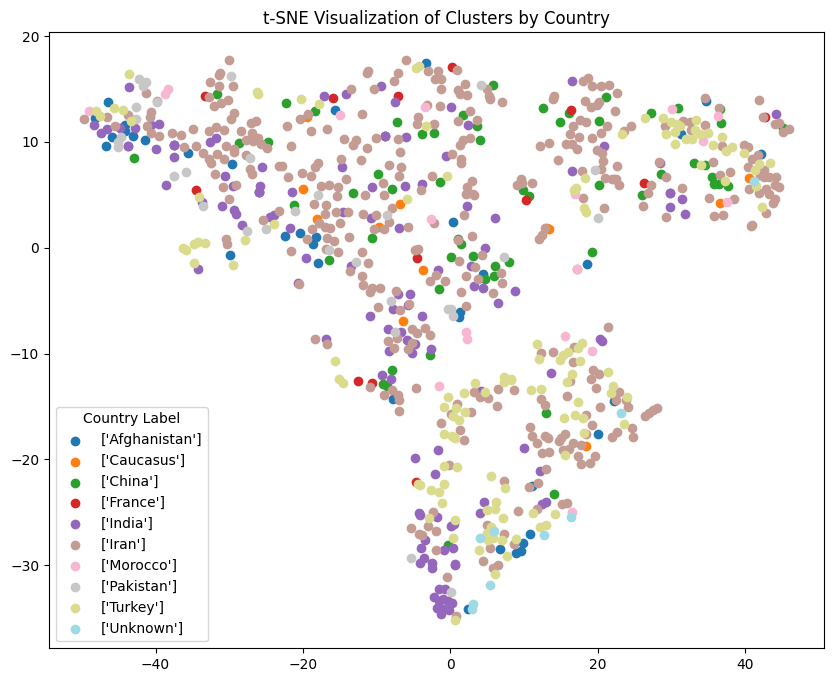

In [147]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
valid_data['country_label'] = label_encoder.fit_transform(valid_data['country of origin'])

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(final_embeddings)

num_countries = len(np.unique(valid_data['country_label']))
colors = plt.cm.get_cmap('tab20', num_countries)

plt.figure(figsize=(10, 8))
for label in range(num_countries):
    indices = np.where(valid_data['country_label'] == label)
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], color=colors(label), label=label_encoder.inverse_transform([label]))

plt.title('t-SNE Visualization of Clusters by Country')
plt.legend(title='Country Label')
plt.show()


<ipython-input-170-731823adc6c7>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Price', ticks=[0, 1], boundaries=np.linspace(0, 1, num_prices), format='%.2f')


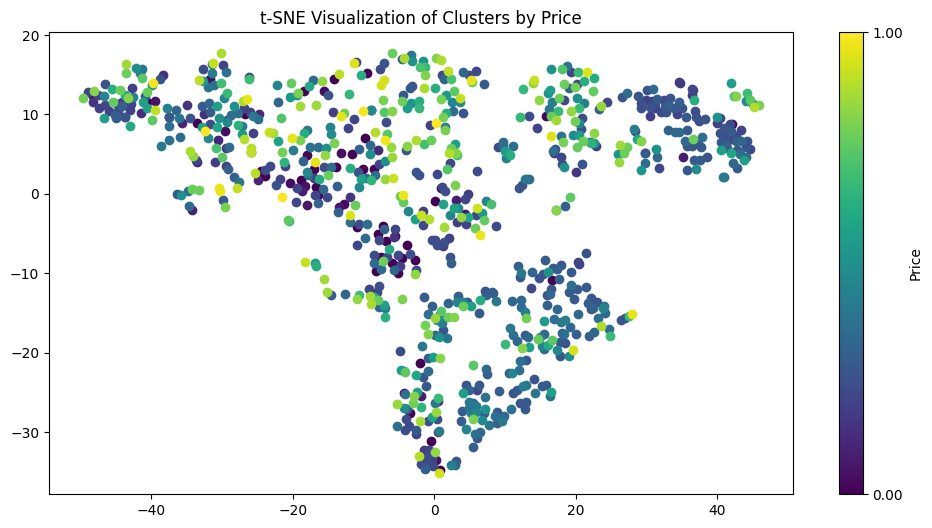

In [170]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
valid_data['price_label'] = label_encoder.fit_transform(valid_data['price'])

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(final_embeddings)

num_prices = len(np.unique(valid_data['price_label']))
colors = plt.cm.viridis(np.linspace(0, 1, num_prices))

plt.figure(figsize=(12, 6))

# Plot the t-SNE visualization
for label in range(num_prices):
    indices = np.where(valid_data['price_label'] == label)
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], color=colors[label])

# Create a color gradient legend for the sidebar
price_range = valid_data['price'].max() - valid_data['price'].min()
price_ticks = [valid_data['price'].min(), valid_data['price'].max()]
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Price', ticks=[0, 1], boundaries=np.linspace(0, 1, num_prices), format='%.2f')

plt.title('t-SNE Visualization of Clusters by Price')
plt.show()

In [191]:
inputs = pil_to_tensor(val_dataset[512]['image']).cuda()

In [186]:
query_embedding = model(inputs.unsqueeze(0))

k = 5
query_embedding_np = query_embedding.detach().cpu().numpy()

# Perform the search
distances, indices = index.search(query_embedding_np, k)

In [187]:
indices

array([[512, 187, 136, 546, 450]])

In [209]:
valid_data.head()

item number                name country of origin          size      made  \
0        63194    Soumak, ca. 1920          Caucasus  414 x 307 cm  ca. 1920   
1        66624   Shirvan, ca. 1910          Caucasus  246 x 127 cm  ca. 1910   
2        63183    Soumak, ca. 1880          Caucasus  292 x 139 cm  ca. 1880   
3        71160  Karabagh, ca. 1900          Caucasus  576 x 197 cm  ca. 1900   
4        63206    Soumak, ca. 1920          Caucasus  284 x 244 cm  ca. 1920   

   pile                 design                          ground color  \
0   NaN    geometric / allover  blue / dark blue / navy / rust / red   
1  wool    geometric / allover                            light blue   
2   NaN    geometric / allover                     rust / red / blue   
3  wool    geometric / allover                     red / rosé / gray   
4   NaN  geometric / medallion        ivory / dark blue / navy / red   

                                             remarks  price  \
0  This is a unique handmade / hand-knotted / tra...   9200   
1  This is a unique handmade / hand-knotted / tra...   4200   
2  This is a unique handmade / hand-knotted / tra...   8500   
3  This is a unique handmade / hand-knotted / tra...   7700   
4  This is a unique handmade / hand-knotted / tra...   6400   

                                         description  \
0  This piece is a Kilim. What is a Kilim? "Kilim...   
1  Shirvan is located in West Caucasia in Azerbai...   
2  This piece is a Kilim. What is a Kilim? "Kilim...   
3  Karabagh is located in the Russian part of Aze...   
4  This piece is a Kilim. What is a Kilim? "Kilim...   

                 foundation(warp and weft)  age knots per sqm       \
0  wool (this is a flatweave without pile)  NaN           NaN  NaN   
1                                      NaN  NaN           NaN  NaN   
2  wool (this is a flatweave without pile)  NaN           NaN  NaN   
3                                      NaN  NaN           NaN  NaN   
4  wool (this is a flatweave without pile)  NaN           NaN  NaN   

   country_label  price_label  
0              1          105  
1              1           60  
2              1           99  
3              1           92  
4              1           80

In [208]:
len(valid_data)

830

In [188]:
item_numbers = [valid_data['item number'][i] for i in indices[0]]

In [189]:
item_numbers

[65486, 56549, 62987, 68460, 71078]

In [207]:
valid_data[valid_data['item number'] == 32]['country of origin']

Series([], Name: country of origin, dtype: object)

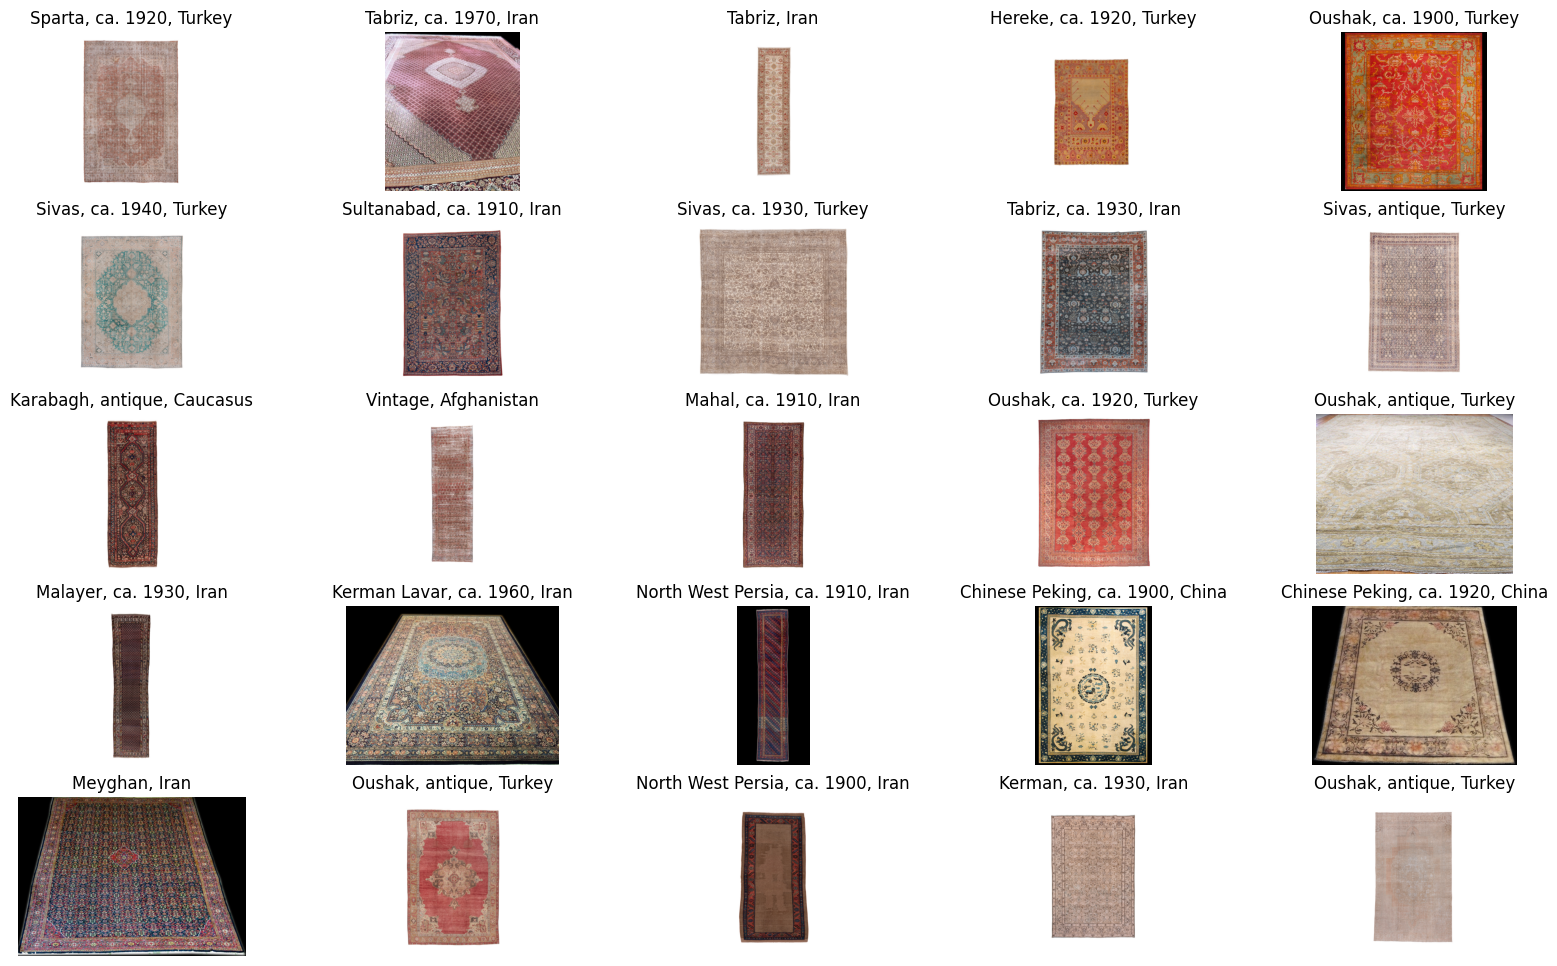

In [235]:
import os
import matplotlib.pyplot as plt

folder_path = "/content/drive/MyDrive/RugNet/images"

n_rows = 5

rug_indices = [512, 420, 8, 320, 400]

def plot_image_for_number(number):
    folder_name = str(number)
    image_name = f"{number}.jpg"
    folder_path_with_number = os.path.join(folder_path, folder_name)
    image_path = os.path.join(folder_path_with_number, image_name)

    if not os.path.exists(folder_path_with_number):
        print(f"Folder for number {number} not found.")
        return None

    if not os.path.exists(image_path):
        print(f"Image for number {number} not found.")
        return None

    return plt.imread(image_path)


fig, axes = plt.subplots(n_rows, len(item_numbers), figsize=(20, 12))


for ri, r_i in enumerate(rug_indices):
  inputs = pil_to_tensor(val_dataset[r_i]['image']).cuda()
  query_embedding = model(inputs.unsqueeze(0))

  k = 5
  query_embedding_np = query_embedding.detach().cpu().numpy()

  # Perform the search
  distances, indices = index.search(query_embedding_np, k)

  item_numbers = [valid_data['item number'][i] for i in indices[0]]

  for i, number in enumerate(item_numbers):
      img = plot_image_for_number(number)
      if img is not None:
          axes[ri, i].imshow(img)
          axes[ri, i].set_title(f"{valid_data[valid_data['item number'] == number]['name'][indices[0][i]]}, {valid_data[valid_data['item number'] == number]['country of origin'][indices[0][i]]}")
          axes[ri, i].axis('off')

plt.show()


In [214]:
valid_data['item number'][0]

63194

In [213]:
item_numbers

[0, 45564, 63170, 57433, 58920]

## 4.1 Comparison with Supervised Methods

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

resnet18 = models.resnet18(pretrained=True)

num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


In [ ]:
train_dataset = RugNet(train_data['item number'], labels = train_data['country of origin'], transform=None)

125it [01:20,  1.52it/s]

Error processing /content/drive/MyDrive/RugNet/images/38951/38951.2.jpg


220it [02:15,  1.97it/s]

Error processing /content/drive/MyDrive/RugNet/images/55377/55377.2.jpg


373it [04:44,  1.70it/s]

Error processing /content/drive/MyDrive/RugNet/images/35712/35712.jpg


426it [05:14,  2.13it/s]

Error processing /content/drive/MyDrive/RugNet/images/55355/55355.2.jpg


446it [05:25,  1.88it/s]

Error processing /content/drive/MyDrive/RugNet/images/63450/63450.2.jpg


579it [06:34,  2.03it/s]

Error processing /content/drive/MyDrive/RugNet/images/38942/38942.2.jpg


633it [07:13,  1.96s/it]

Error processing /content/drive/MyDrive/RugNet/images/38945/38945.2.jpg


808it [08:50,  2.04it/s]

Error processing /content/drive/MyDrive/RugNet/images/56278/56278.2.jpg


1234it [12:18,  2.55it/s]

Error processing /content/drive/MyDrive/RugNet/images/56279/56279.2.jpg


1466it [14:04,  2.42it/s]

Error processing /content/drive/MyDrive/RugNet/images/37506/37506.2.jpg


1550it [14:39,  2.40it/s]

Error processing /content/drive/MyDrive/RugNet/images/44577/44577.2.jpg


1737it [15:55,  2.23it/s]

Error processing /content/drive/MyDrive/RugNet/images/33823/33823.2.jpg


1811it [16:24,  2.35it/s]

Error processing /content/drive/MyDrive/RugNet/images/44585/44585.2.jpg


1823it [16:28,  2.71it/s]

Error processing /content/drive/MyDrive/RugNet/images/40541/40541.2.jpg


1860it [16:43,  2.21it/s]

Error processing /content/drive/MyDrive/RugNet/images/44581/44581.2.jpg


1917it [17:05,  2.58it/s]

Error processing /content/drive/MyDrive/RugNet/images/44582/44582.2.jpg


1924it [17:07,  2.66it/s]

Error processing /content/drive/MyDrive/RugNet/images/38961/38961.2.jpg


2026it [17:48,  2.54it/s]

Error processing /content/drive/MyDrive/RugNet/images/41141/41141.2.jpg


2066it [18:04,  2.22it/s]

Error processing /content/drive/MyDrive/RugNet/images/55374/55374.2.jpg


2136it [18:32,  2.29it/s]

Error processing /content/drive/MyDrive/RugNet/images/44580/44580.2.jpg


2139it [18:33,  2.96it/s]

Error processing /content/drive/MyDrive/RugNet/images/56267/56267.2.jpg


2351it [20:08,  2.22it/s]

Error processing /content/drive/MyDrive/RugNet/images/44584/44584.2.jpg


2372it [20:16,  2.75it/s]

Error processing /content/drive/MyDrive/RugNet/images/40977/40977.2.jpg


2389it [20:22,  2.46it/s]

Error processing /content/drive/MyDrive/RugNet/images/55343/55343.2.jpg


2424it [20:36,  2.45it/s]

Error processing /content/drive/MyDrive/RugNet/images/58252/58252.2.jpg


2467it [20:53,  2.63it/s]

Error processing /content/drive/MyDrive/RugNet/images/41549/41549.2.jpg


2505it [21:07,  2.56it/s]

Error processing /content/drive/MyDrive/RugNet/images/55391/55391.2.jpg


2522it [21:14,  2.15it/s]

Error processing /content/drive/MyDrive/RugNet/images/61558/61558.2.jpg


2543it [21:22,  2.61it/s]

Error processing /content/drive/MyDrive/RugNet/images/55348/55348.2.jpg


2663it [22:10,  2.49it/s]

Error processing /content/drive/MyDrive/RugNet/images/56280/56280.2.jpg


2703it [22:25,  2.48it/s]

Error processing /content/drive/MyDrive/RugNet/images/56478/56478.2.jpg
Error processing /content/drive/MyDrive/RugNet/images/56272/56272.2.jpg


2808it [23:07,  2.67it/s]

Error processing /content/drive/MyDrive/RugNet/images/33814/33814.2.jpg


2925it [23:59,  2.78it/s]

Error processing /content/drive/MyDrive/RugNet/images/56276/56276.2.jpg


3049it [25:05,  2.46it/s]

Error processing /content/drive/MyDrive/RugNet/images/44583/44583.2.jpg


3135it [25:42,  2.48it/s]

Error processing /content/drive/MyDrive/RugNet/images/38955/38955.2.jpg


3218it [26:15,  2.59it/s]

Error processing /content/drive/MyDrive/RugNet/images/44576/44576.2.jpg


3236it [26:22,  2.60it/s]

Error processing /content/drive/MyDrive/RugNet/images/55341/55341.2.jpg


3476it [28:06,  2.40it/s]

Error processing /content/drive/MyDrive/RugNet/images/38932/38932.2.jpg


5952it [46:32,  2.55it/s]

Error processing /content/drive/MyDrive/RugNet/images/58925/58925.2.jpg


5971it [46:38,  2.55it/s]

Error processing /content/drive/MyDrive/RugNet/images/56269/56269.2.jpg


6666it [51:37,  2.15it/s]


In [ ]:
with open('/content/drive/MyDrive/RugNet/train_dataset_noaug.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)

In [ ]:
train_dataset = RugNet(train_data['item number'], labels = train_data['country of origin'], transform=None)
val_dataset = RugNet(valid_data['item number'], labels = valid_data['country of origin'], transform=None)

124it [00:08, 14.03it/s]

Error processing /content/drive/MyDrive/RugNet/images/38951/38951.2.jpg


220it [01:01,  1.78it/s]

Error processing /content/drive/MyDrive/RugNet/images/55377/55377.2.jpg


373it [02:23,  1.89it/s]

Error processing /content/drive/MyDrive/RugNet/images/35712/35712.jpg


426it [02:52,  1.87it/s]

Error processing /content/drive/MyDrive/RugNet/images/55355/55355.2.jpg


446it [03:03,  1.72it/s]

Error processing /content/drive/MyDrive/RugNet/images/63450/63450.2.jpg


579it [04:18,  1.62it/s]

Error processing /content/drive/MyDrive/RugNet/images/38942/38942.2.jpg


633it [04:50,  1.79it/s]

Error processing /content/drive/MyDrive/RugNet/images/38945/38945.2.jpg


808it [06:24,  2.07it/s]

Error processing /content/drive/MyDrive/RugNet/images/56278/56278.2.jpg


1234it [10:02,  1.96it/s]

Error processing /content/drive/MyDrive/RugNet/images/56279/56279.2.jpg


1466it [12:02,  1.93it/s]

Error processing /content/drive/MyDrive/RugNet/images/37506/37506.2.jpg


1550it [12:44,  2.11it/s]

Error processing /content/drive/MyDrive/RugNet/images/44577/44577.2.jpg


1737it [14:20,  1.82it/s]

Error processing /content/drive/MyDrive/RugNet/images/33823/33823.2.jpg


1811it [14:57,  1.94it/s]

Error processing /content/drive/MyDrive/RugNet/images/44585/44585.2.jpg


1823it [15:03,  2.07it/s]

Error processing /content/drive/MyDrive/RugNet/images/40541/40541.2.jpg


1860it [15:21,  1.93it/s]

Error processing /content/drive/MyDrive/RugNet/images/44581/44581.2.jpg


1917it [15:49,  1.88it/s]

Error processing /content/drive/MyDrive/RugNet/images/44582/44582.2.jpg


1924it [15:52,  2.12it/s]

Error processing /content/drive/MyDrive/RugNet/images/38961/38961.2.jpg


2026it [16:44,  1.87it/s]

Error processing /content/drive/MyDrive/RugNet/images/41141/41141.2.jpg


2066it [17:04,  1.89it/s]

Error processing /content/drive/MyDrive/RugNet/images/55374/55374.2.jpg


2136it [17:41,  1.71it/s]

Error processing /content/drive/MyDrive/RugNet/images/44580/44580.2.jpg


2139it [17:42,  2.24it/s]

Error processing /content/drive/MyDrive/RugNet/images/56267/56267.2.jpg


2270it [18:52,  1.93it/s]

Error processing /content/drive/MyDrive/RugNet/images/58043/58043.jpg


2351it [19:34,  1.88it/s]

Error processing /content/drive/MyDrive/RugNet/images/44584/44584.2.jpg


2372it [19:43,  2.21it/s]

Error processing /content/drive/MyDrive/RugNet/images/40977/40977.2.jpg


2389it [19:53,  1.66it/s]

Error processing /content/drive/MyDrive/RugNet/images/55343/55343.2.jpg


2424it [20:10,  2.11it/s]

Error processing /content/drive/MyDrive/RugNet/images/58252/58252.2.jpg


2467it [20:32,  1.91it/s]

Error processing /content/drive/MyDrive/RugNet/images/41549/41549.2.jpg


2505it [20:50,  2.07it/s]

Error processing /content/drive/MyDrive/RugNet/images/55391/55391.2.jpg


2522it [20:59,  1.76it/s]

Error processing /content/drive/MyDrive/RugNet/images/61558/61558.2.jpg


2543it [21:09,  1.97it/s]

Error processing /content/drive/MyDrive/RugNet/images/55348/55348.2.jpg


2663it [22:10,  1.85it/s]

Error processing /content/drive/MyDrive/RugNet/images/56280/56280.2.jpg


2703it [22:30,  2.02it/s]

Error processing /content/drive/MyDrive/RugNet/images/56478/56478.2.jpg
Error processing /content/drive/MyDrive/RugNet/images/56272/56272.2.jpg


2808it [23:23,  1.80it/s]

Error processing /content/drive/MyDrive/RugNet/images/33814/33814.2.jpg


2925it [24:21,  2.16it/s]

Error processing /content/drive/MyDrive/RugNet/images/56276/56276.2.jpg


3049it [25:22,  2.05it/s]

Error processing /content/drive/MyDrive/RugNet/images/44583/44583.2.jpg


3135it [26:06,  1.90it/s]

Error processing /content/drive/MyDrive/RugNet/images/38955/38955.2.jpg


3218it [27:38,  2.02it/s]

Error processing /content/drive/MyDrive/RugNet/images/44576/44576.2.jpg


3236it [27:46,  2.07it/s]

Error processing /content/drive/MyDrive/RugNet/images/55341/55341.2.jpg


3476it [29:49,  1.94it/s]

Error processing /content/drive/MyDrive/RugNet/images/38932/38932.2.jpg


5952it [51:25,  2.19it/s]

Error processing /content/drive/MyDrive/RugNet/images/58925/58925.2.jpg


5971it [51:34,  1.86it/s]

Error processing /content/drive/MyDrive/RugNet/images/56269/56269.2.jpg


6666it [57:26,  1.93it/s]
167it [01:17,  2.04it/s]

Error processing /content/drive/MyDrive/RugNet/images/59458/59458.jpg


520it [04:15,  2.21it/s]

Error processing /content/drive/MyDrive/RugNet/images/42532/42532.jpg


768it [06:20,  1.97it/s]

Error processing /content/drive/MyDrive/RugNet/images/56277/56277.2.jpg


833it [06:52,  2.02it/s]


In [8]:
import pickle


with open('/content/drive/MyDrive/RugNet/train_dataset_noaug.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)

# Save val_dataset to a pickle file
with open('/content/drive/MyDrive/RugNet/val_dataset_noaug.pkl', 'wb') as f:
    pickle.dump(val_dataset, f)


NameError: name 'train_dataset' is not defined

In [21]:
import pickle


# Save val_dataset to a pickle file
with open('/content/drive/MyDrive/RugNet/val_dataset_noaug.pkl', 'rb') as f:
   val_dataset = pickle.load(f)


In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, num_workers=8,
            batch_size=8, pin_memory=True, collate_fn=collate_custom,
            drop_last=True, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, num_workers=8,
            batch_size=8, pin_memory=True, collate_fn=collate_custom,
            drop_last=False, shuffle=False)
print('Dataset contains {}/{} train/val samples'.format(len(train_dataset), len(val_dataset)))

Dataset contains 6625/830 train/val samples


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(resnet18.parameters(), lr=0.001)


num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    # Training
    resnet18.train()
    running_train_loss = 0.0
    for batch in tqdm(train_dataloader):

        inputs = batch['image'].float().cuda(non_blocking=True)
        labels = torch.tensor([train_dataset.classes[x] for x in batch['image_augmentedtarget']]).cuda(non_blocking=True)
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()
        running_train_loss += train_loss.item()

    # Validation
    resnet18.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch['image'].float().cuda(non_blocking=True)
            labels = torch.tensor([train_dataset.classes[x] for x in batch['image_augmentedtarget']]).cuda(non_blocking=True)
            outputs = resnet18(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_train_loss = running_train_loss / len(train_dataloader)
    epoch_val_loss = running_val_loss / len(val_dataloader)
    accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_val_loss:.4f}, "
          f"Validation Accuracy: {accuracy:.4f}")

print('Finished Training')`

  0%|          | 0/828 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
<ipython-input-23-0f38acde2081>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = resnet18(torch.tensor(batch['images']))
100%|██████████| 828/828 [08:24<00:00,  1.64it/s]
<ipython-input-23-0f38acde2081>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = resnet18(torch.tensor(batch['images']))


Epoch [1/10], Loss: 1.5719, Validation Accuracy: 0.4889


100%|██████████| 828/828 [08:29<00:00,  1.62it/s]


Epoch [2/10], Loss: 1.4536, Validation Accuracy: 0.4042


100%|██████████| 828/828 [08:29<00:00,  1.63it/s]


Epoch [3/10], Loss: 1.3711, Validation Accuracy: 0.5460


100%|██████████| 828/828 [08:27<00:00,  1.63it/s]


Epoch [4/10], Loss: 1.3198, Validation Accuracy: 0.5946


100%|██████████| 828/828 [08:28<00:00,  1.63it/s]


Epoch [5/10], Loss: 1.2487, Validation Accuracy: 0.6308


100%|██████████| 828/828 [08:26<00:00,  1.64it/s]


Epoch [6/10], Loss: 1.2188, Validation Accuracy: 0.6130


100%|██████████| 828/828 [08:24<00:00,  1.64it/s]


Epoch [7/10], Loss: 1.1593, Validation Accuracy: 0.6685


100%|██████████| 828/828 [08:31<00:00,  1.62it/s]


Epoch [8/10], Loss: 1.1205, Validation Accuracy: 0.6737


100%|██████████| 828/828 [08:32<00:00,  1.61it/s]


Epoch [9/10], Loss: 1.0661, Validation Accuracy: 0.6960


100%|██████████| 828/828 [08:30<00:00,  1.62it/s]


Epoch [10/10], Loss: 0.9970, Validation Accuracy: 0.6986
Finished Training


In [ ]:
torch.save(resnet18.state_dict(), '/content/drive/MyDrive/RugNet/resnet18_supervised_10.pt')

In [ ]:
resnet18.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(resnet18.parameters(), lr=0.001)


num_epochs = 20

# Training loop
for epoch in range(10, num_epochs):
    # Training
    resnet18.train()
    running_train_loss = 0.0
    for batch in tqdm(train_dataloader):
        inputs = batch['images'].float().cuda(non_blocking=True)
        labels = torch.tensor(batch['labels']).cuda(non_blocking=True)
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()
        running_train_loss += train_loss.item()

    # Validation
    resnet18.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch['images'].float().cuda(non_blocking=True)
            labels = torch.tensor(batch['labels']).cuda(non_blocking=True)
            outputs = resnet18(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_train_loss = running_train_loss / len(train_dataloader)
    epoch_val_loss = running_val_loss / len(val_dataloader)
    accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_val_loss:.4f}, "
          f"Validation Accuracy: {accuracy:.4f}")

print('Finished Training')

  0%|          | 0/828 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|█████████▉| 824/828 [00:24<00:00, 47.93it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlo

Epoch [11/20], Train Loss: 0.9172, Validation Loss: 0.8704, Validation Accuracy: 0.7017


100%|██████████| 828/828 [00:22<00:00, 36.38it/s]


Epoch [12/20], Train Loss: 0.8010, Validation Loss: 0.6263, Validation Accuracy: 0.7849


100%|██████████| 828/828 [00:22<00:00, 37.08it/s]


Epoch [13/20], Train Loss: 0.7082, Validation Loss: 0.4651, Validation Accuracy: 0.8450


100%|██████████| 828/828 [00:21<00:00, 37.90it/s]


Epoch [14/20], Train Loss: 0.6072, Validation Loss: 0.3899, Validation Accuracy: 0.8712


100%|██████████| 828/828 [00:21<00:00, 38.74it/s]


Epoch [15/20], Train Loss: 0.5109, Validation Loss: 0.3101, Validation Accuracy: 0.9025


100%|██████████| 828/828 [00:22<00:00, 36.55it/s]


Epoch [16/20], Train Loss: 0.4115, Validation Loss: 0.1860, Validation Accuracy: 0.9369


100%|██████████| 828/828 [00:29<00:00, 27.96it/s]


Epoch [17/20], Train Loss: 0.3556, Validation Loss: 0.2081, Validation Accuracy: 0.9327


100%|██████████| 828/828 [00:22<00:00, 36.32it/s]


Epoch [18/20], Train Loss: 0.2982, Validation Loss: 0.2040, Validation Accuracy: 0.9297


100%|██████████| 828/828 [00:21<00:00, 38.03it/s]


Epoch [19/20], Train Loss: 0.2704, Validation Loss: 0.1144, Validation Accuracy: 0.9665


100%|██████████| 828/828 [00:26<00:00, 31.22it/s]


Epoch [20/20], Train Loss: 0.2219, Validation Loss: 0.0911, Validation Accuracy: 0.9728
Finished Training


In [ ]:
torch.save(resnet18.state_dict(), '/content/drive/MyDrive/RugNet/resnet18_supervised_20.pt')

In [ ]:
state_dict = torch.load('/content/drive/MyDrive/RugNet/resnet18_supervised_20.pt', map_location=torch.device('cpu'))

resnet18 = models.resnet18(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)

In [ ]:
resnet18.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
resnet18.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(resnet18.parameters(), lr=0.001)



# Training loop
for epoch in range(20, 22):
    # Training
    resnet18.train()
    running_train_loss = 0.0
    for batch in tqdm(train_dataloader):
        inputs = batch['images'].float().cuda(non_blocking=True)
        labels = torch.tensor(batch['labels']).cuda(non_blocking=True)
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()
        running_train_loss += train_loss.item()

    # Validation
    resnet18.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch['images'].float().cuda(non_blocking=True)
            labels = torch.tensor(batch['labels']).cuda(non_blocking=True)
            outputs = resnet18(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_train_loss = running_train_loss / len(train_dataloader)
    epoch_val_loss = running_val_loss / len(val_dataloader)
    accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_val_loss:.4f}, "
          f"Validation Accuracy: {accuracy:.4f}")

print('Finished Training')

  0%|          | 0/828 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|█████████▉| 827/828 [00:25<00:00, 39.60it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlo

Epoch [21/25], Train Loss: 0.2213, Validation Loss: 0.1661, Validation Accuracy: 0.9404


100%|██████████| 828/828 [00:22<00:00, 36.72it/s]


Epoch [22/25], Train Loss: 0.1781, Validation Loss: 0.1504, Validation Accuracy: 0.9485
Finished Training


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(resnet18.parameters(), lr=0.001)



# Training loop
for epoch in range(22, 25):
    # Training
    resnet18.train()
    running_train_loss = 0.0
    for batch in tqdm(train_dataloader):
        inputs = batch['images'].float().cuda(non_blocking=True)
        labels = torch.tensor(batch['labels']).cuda(non_blocking=True)
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()
        running_train_loss += train_loss.item()

    # Validation
    resnet18.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch['images'].float().cuda(non_blocking=True)
            labels = torch.tensor(batch['labels']).cuda(non_blocking=True)
            outputs = resnet18(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_train_loss = running_train_loss / len(train_dataloader)
    epoch_val_loss = running_val_loss / len(val_dataloader)
    accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_val_loss:.4f}, "
          f"Validation Accuracy: {accuracy:.4f}")

print('Finished Training')

100%|██████████| 828/828 [00:24<00:00, 33.93it/s]


Epoch [23/25], Train Loss: 0.1841, Validation Loss: 0.0811, Validation Accuracy: 0.9769


100%|██████████| 828/828 [00:23<00:00, 35.36it/s]


Epoch [24/25], Train Loss: 0.1675, Validation Loss: 0.0890, Validation Accuracy: 0.9706


100%|██████████| 828/828 [00:22<00:00, 36.06it/s]


Epoch [25/25], Train Loss: 0.1432, Validation Loss: 0.1175, Validation Accuracy: 0.9630
Finished Training


In [ ]:
torch.save(resnet18.state_dict(), '/content/drive/MyDrive/RugNet/resnet18_supervised_25.pt')

Here I test a few examples that are from outside of the training and validation sets:

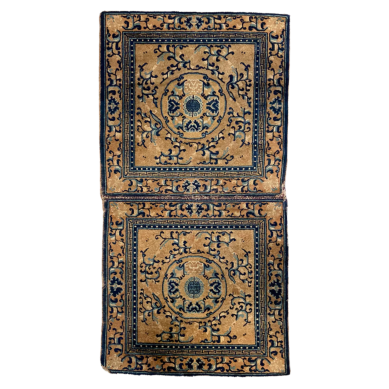

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/Untitleddesign_5_a576517d-0c5e-42c4-af3f-c5bd5f3e2e72.webp")

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = "/content/Untitleddesign_5_a576517d-0c5e-42c4-af3f-c5bd5f3e2e72.webp"
image = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [ ]:
input_tensor = preprocess(image)

input_batch = input_tensor[:3, :, :].unsqueeze(0)
outputs = resnet18(input_batch.cuda()).detach().cpu().numpy()

train_dataset.classes[np.argmax(outputs)]

'China'

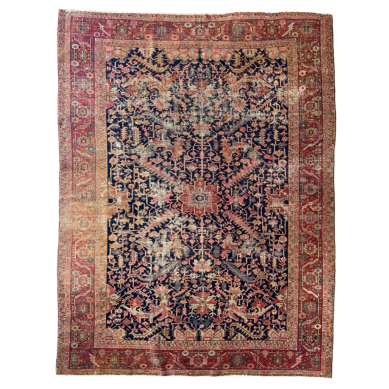

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/Untitleddesign_1_155d375a-4b60-4ec0-a5e6-faa80aa34aab.webp")

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = "/content/Untitleddesign_1_155d375a-4b60-4ec0-a5e6-faa80aa34aab.webp"
image = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [ ]:
input_tensor = preprocess(image)

input_batch = input_tensor[:3, :, :].unsqueeze(0)
outputs = resnet18(input_batch.cuda()).detach().cpu().numpy()

train_dataset.classes[np.argmax(outputs)]

'Iran'

 # 5. Conclusion
In this assignment I examined unsupervised clustering of images of antique rugs via contrastive learning, and compare with supervised learning. I show that supervised models like ResNet18 can practically solve the problem of classifying rugs to their country of origin, but unsupervised techniques struggle. Interestingly, unsupervised clustering enables finding similar rugs from across cultures, as shown below (my unsupervised model places the second rug as the nearest neighbor to the first, even though they are from different locations).

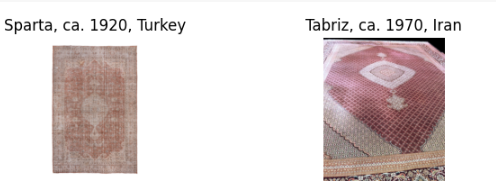

# References

Chen, T., Kornblith, S., Norouzi, M., & Hinton, G. (2020, November). A simple framework for contrastive learning of visual representations. In International conference on machine learning (pp. 1597-1607). PMLR.

Van Gansbeke, W., Vandenhende, S., Georgoulis, S., Proesmans, M., & Van Gool, L. (2020, August). Scan: Learning to classify images without labels. In European conference on computer vision (pp. 268-285). Cham: Springer International Publishing

Future Market Insights, Inc. (2024, February 1). *Carpet and Rug Market is Projected to Surpass US$ 171.0 Billion by 2034, Boasting a Resilient 6.2% CAGR*. Yahoo Finance. Retrieved from https://finance.yahoo.com/news/carpet-rug-market-projected-surpass-133000516.html